In [1]:
import pandas as pd
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

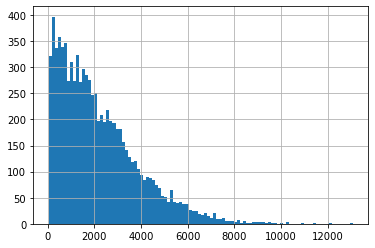

In [8]:
train['Item_Outlet_Sales'].hist(bins=100);

 it is a right skewd variable and would need some data transformation to treat its skewness.

<AxesSubplot:>

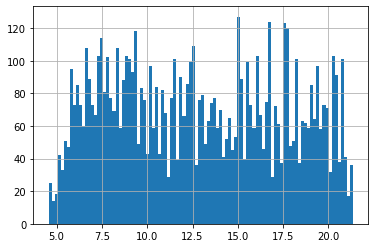

In [9]:
train['Item_Weight'].hist(bins=100)

No clear cut pattern

<AxesSubplot:>

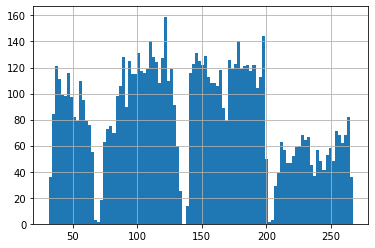

In [10]:
train['Item_MRP'].hist(bins = 100)

Four different distributions

<AxesSubplot:>

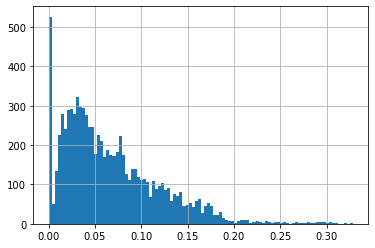

In [11]:
train['Item_Visibility'].hist(bins = 100)

Right skewed

### Analysis with categorical variables

In [13]:
import seaborn as sns

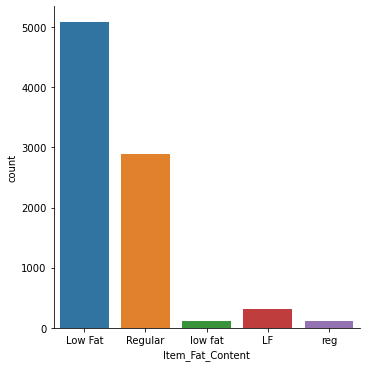

In [14]:
sns.catplot(x="Item_Fat_Content", kind="count", data=train)

In [16]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace=True)

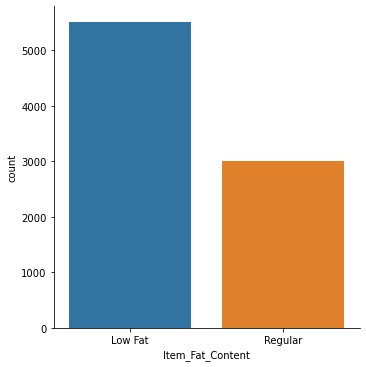

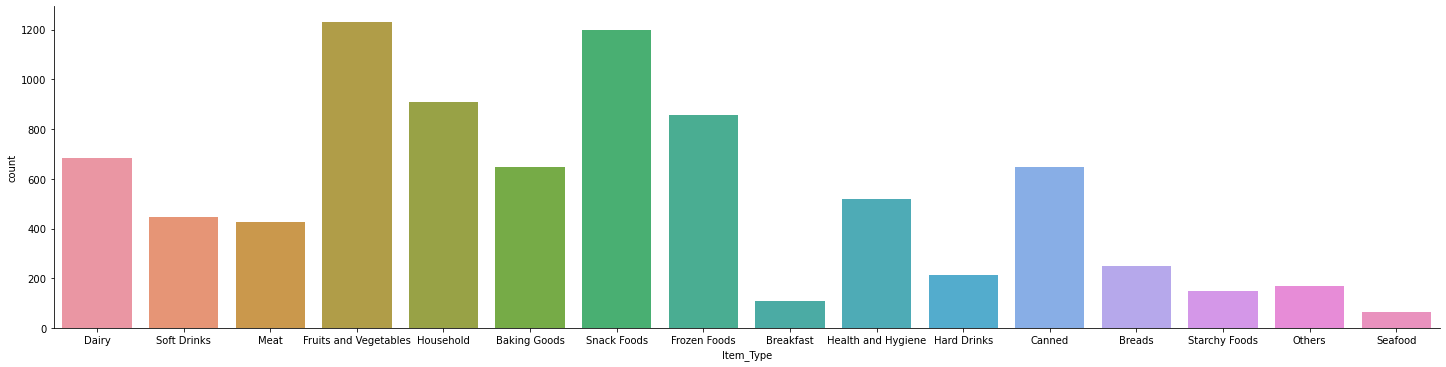

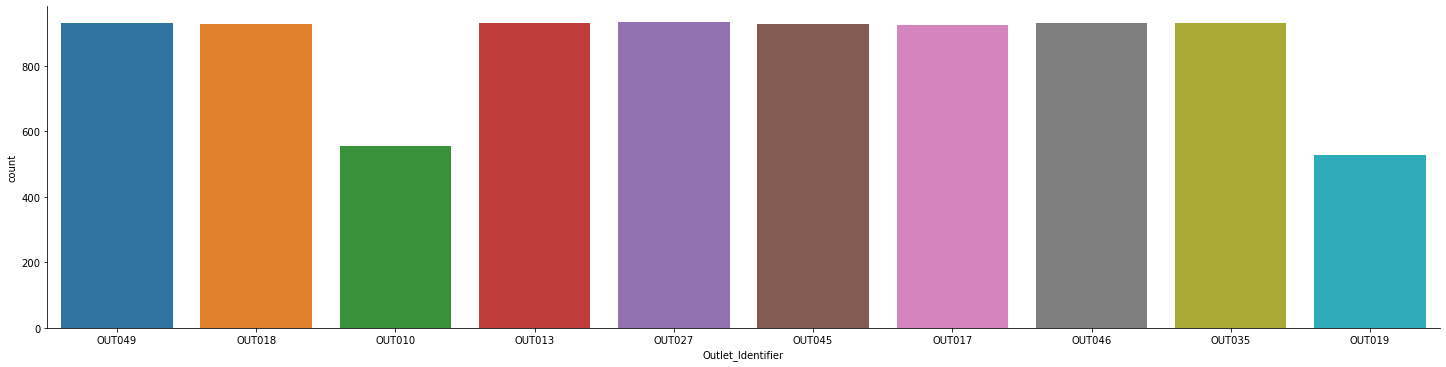

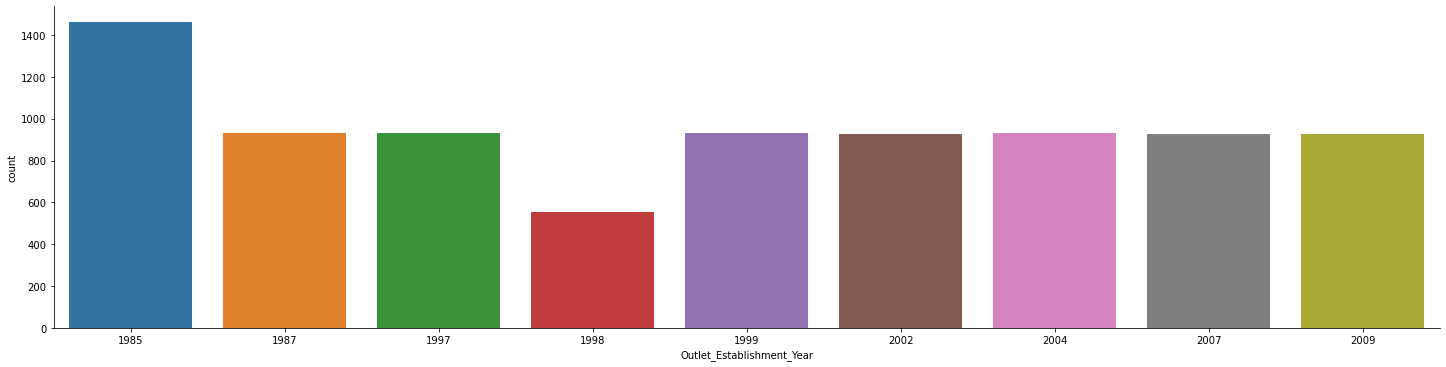

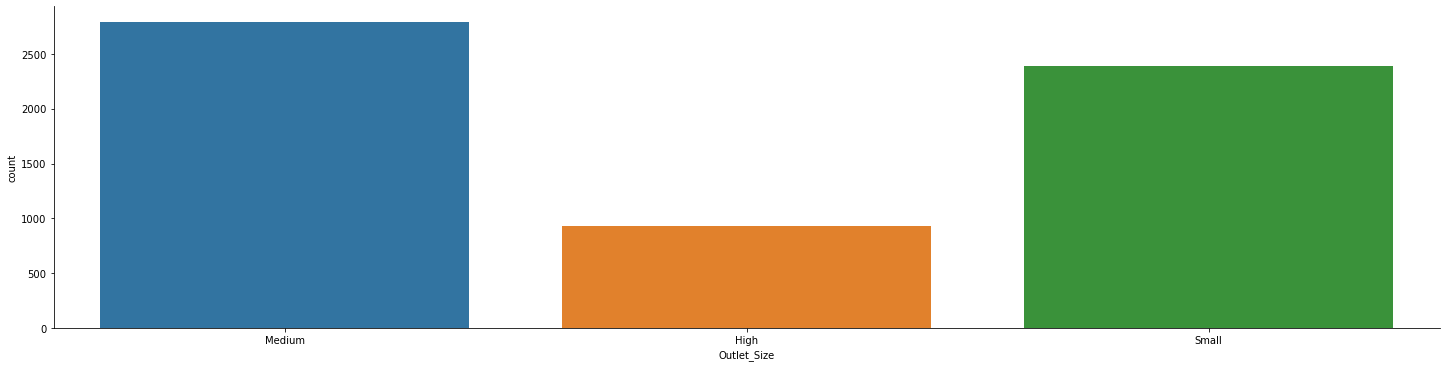

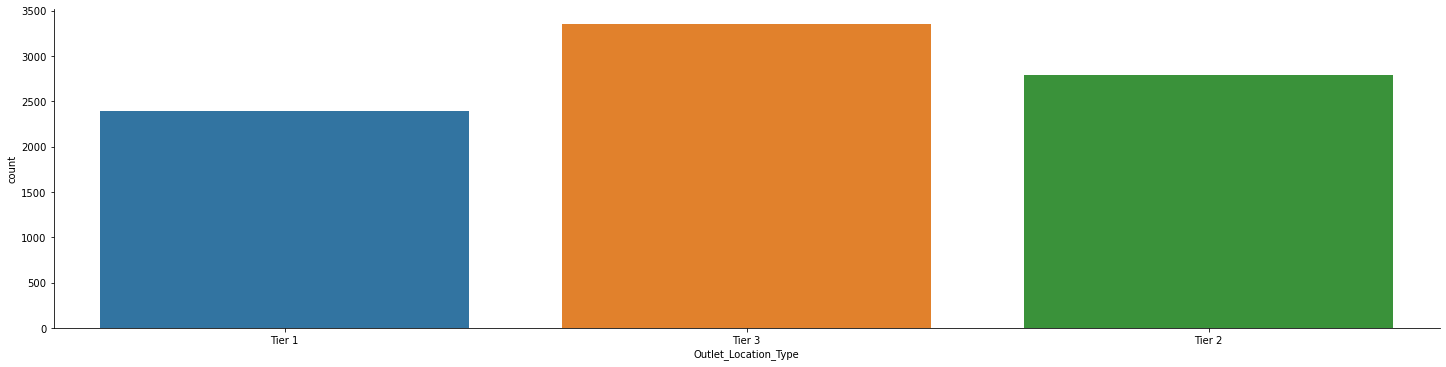

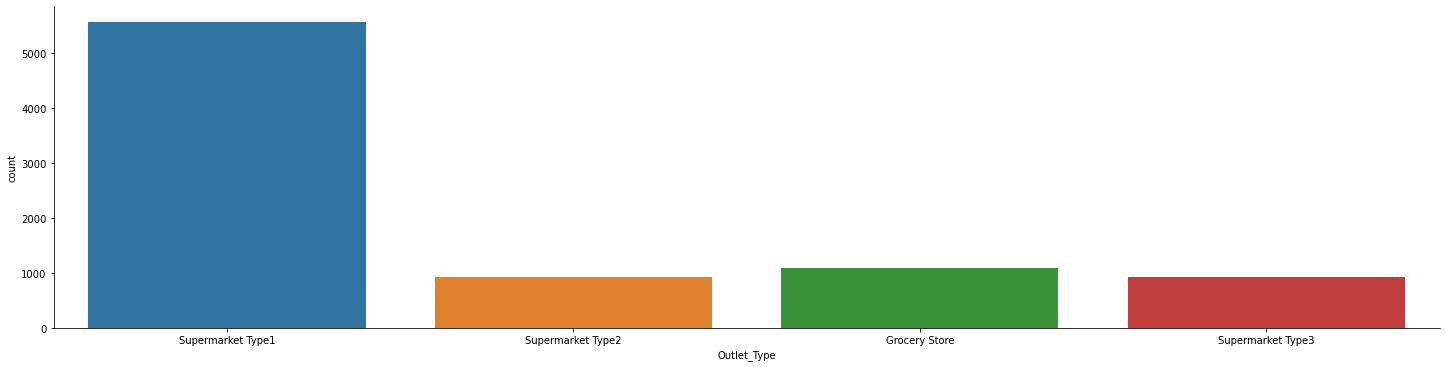

In [23]:
sns.catplot(x='Item_Fat_Content',kind='count',data=train)
sns.catplot(x='Item_Type',kind='count',data=train,aspect=4)
sns.catplot(x='Outlet_Identifier',kind='count',data=train,aspect=4)
sns.catplot(x='Outlet_Establishment_Year',kind='count',data=train,aspect=4)
sns.catplot(x='Outlet_Size',kind='count',data=train,aspect=4)
sns.catplot(x='Outlet_Location_Type',kind='count',data=train,aspect=4)
sns.catplot(x='Outlet_Type',kind='count',data=train,aspect=4)





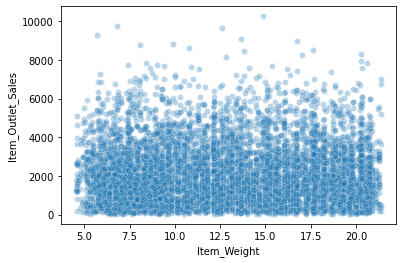

In [24]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

The Scatter plot is uniformly distributed 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

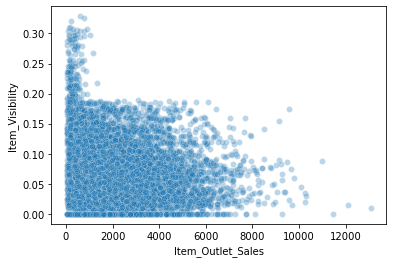

In [25]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

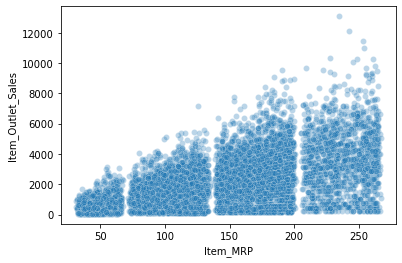

In [26]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)



Observations

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern. In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages. In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

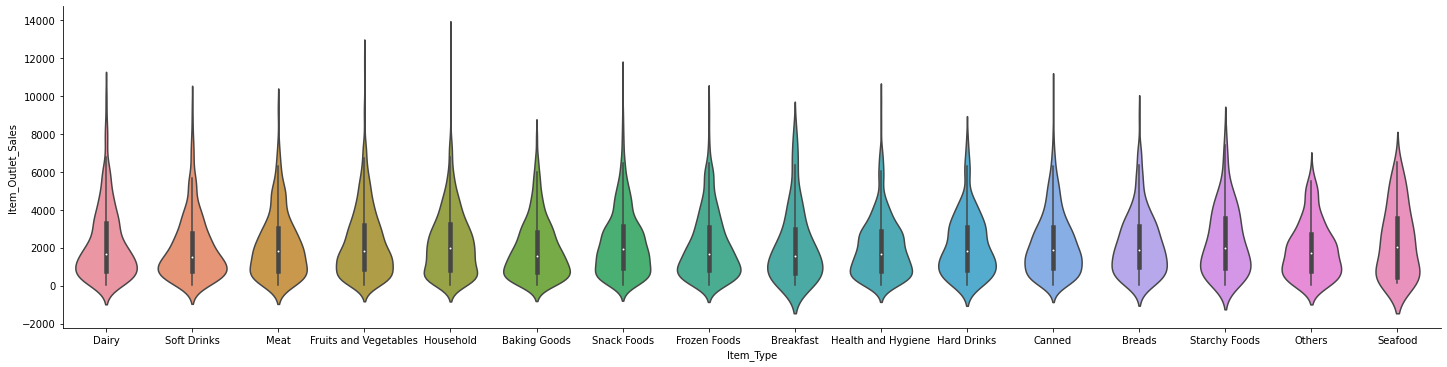

In [28]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


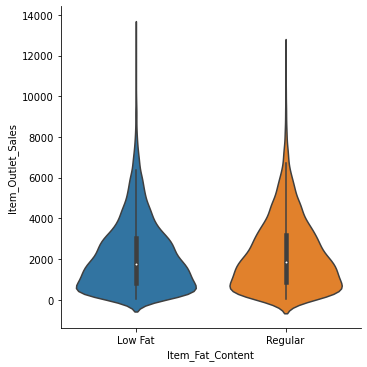

In [32]:
sns.catplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train,kind='violin')

/Users/meghanachenreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

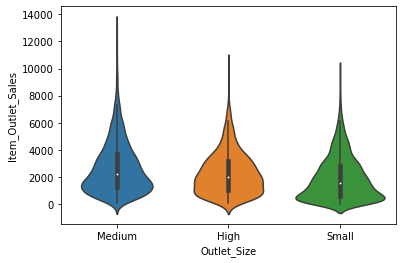

In [33]:
sns.violinplot('Outlet_Size','Item_Outlet_Sales',data = train)

/Users/meghanachenreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

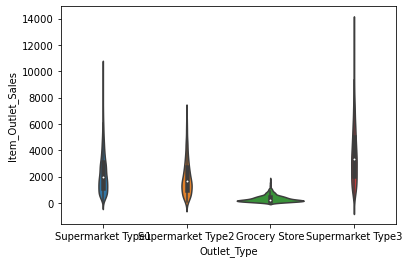

In [34]:
sns.violinplot('Outlet_Type','Item_Outlet_Sales',data = train)

In [39]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Data Treatment

Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions. So, it becomes imperative to carry out missing data imputation. There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:

1) Deletion of rows: In train dataset, observations having missing values in any variable are deleted. The downside of this method is the loss of information and drop in prediction power of model. 2) Mean/Median/Mode Imputation: In case of continuous variable, missing values can be replaced with mean or median of all known values of that variable. For categorical variables, we can use mode of the given values to replace the missing values. 3)Building Prediction Model: We can even make a predictive model to impute missing data in a variable. Here we will treat the variable having missing data as the target variable and the other variables as predictors. We will divide our data into 2 datasets—one without any missing value for that variable and the other with missing values for that variable. The former set would be used as training set to build the predictive model and it would then be applied to the latter set to predict the missing values.

In [40]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)


In [41]:
train.Item_Weight.isna().sum()

0

In [49]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [50]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [51]:
train['Outlet_Size'].isna().sum()

0

<AxesSubplot:ylabel='Frequency'>

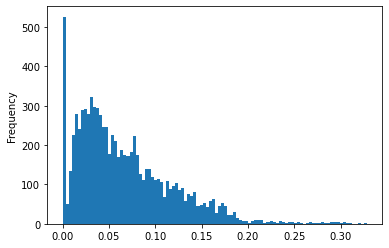

In [52]:
train['Item_Visibility'].plot(kind='hist',bins=100)

In [53]:
a=train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [54]:
train['Item_Visibility']=train['Item_Visibility'].replace(0.00,a)

<AxesSubplot:ylabel='Frequency'>

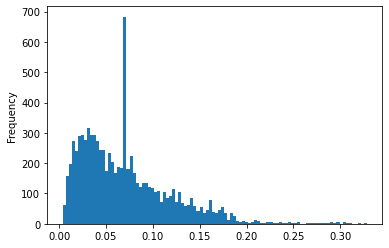

In [55]:
train['Item_Visibility'].plot(kind='hist',bins=100)

Feature Engineering

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

Item_Type_new: Broader categories for the variable Item_Type.

Item_category: Categorical variable derived from Item_Identifier.

Outlet_Years: Years of operation for outlets.

price_per_unit_wt: Item_MRP/Item_Weight

Item_MRP_clusters: Binned feature for Item_MRP.

We can have a look at the Item_Type variable and classify the c ategories into perishable and non_perishable as per our understanding and make it into a new feature.

In [59]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [60]:
perishable=["Breads","BreakFast","Dairy","Fruits and vegetables","Meat","Seafood"]
non_perishable=["Baking Goods","Caned","Frozen Foods","Hard Drinks","Health and Hygiene","Household","Soft Drinks"]

In [61]:
item_list=[]
for i in train['Item_Type']:
    if i in perishable:
        item_list.append("perishable")
    elif i in non_perishable:
        item_list.append("non-perishable")
    else:
        item_list.append("not_sure")
train['Item_Type_new']=item_list
            

In [63]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [64]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

Item_Category,DR,FD,NC
Item_Type,,,
Baking Goods,0,648,0
Breads,0,251,0
Breakfast,0,110,0
Canned,0,649,0
Dairy,140,542,0
Frozen Foods,0,856,0
Fruits and Vegetables,0,1232,0
Hard Drinks,214,0,0
Health and Hygiene,0,0,520


We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

In [67]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

<ipython-input-67-ac633f330134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'


In [68]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [69]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In [70]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
    
    
train['Item_MRP_Clusters']=train['Item_MRP'].astype('int').apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Item_Category,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,not_sure,FD,9.484115,3rd
4,NCD19,8.93,Non Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,6.031512,1st


In [71]:
train['Item_MRP_Clusters'].unique()

array(['4th', '1st', '3rd', '2nd'], dtype=object)

Encoding Categorical Variables

Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

1). Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

2). In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).
Label encoding for the categorical variables

We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [72]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le=LabelEncoder
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

In [102]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Price_Per_Unit_Weight,Item_MRP_Clusters
0,9.30,0,-4.132215,249.8092,1999,1,0,3735.1380,3.290683,3
1,5.92,2,-3.948780,48.2692,2009,1,2,443.4228,2.098457,0
2,17.50,0,-4.088756,141.6180,1999,1,0,2097.2700,2.090932,2
3,19.20,2,-2.652400,182.0950,1998,2,2,732.3800,2.249618,2
4,8.93,1,-2.652400,53.8614,1987,0,2,994.7052,1.796998,0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_new              8523 non-null   object 
 13  Item_Category              8523 non-null   objec

Categorical or nominal
A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, a binary variable (such as yes/no question) is a categorical variable having two categories (yes or no) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely nominal variable is one that simply allows you to assign categories but you cannot clearly order the categories.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

Ordinal
An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. Now consider a variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate.  Even though we can order these from lowest to highest, the spacing between the values may not be the same across the levels of the variables. Say we assign scores 1, 2, 3 and 4 to these four levels of educational experience and we compare the difference in education between categories one and two with the difference in educational experience between categories two and three, or the difference between categories three and four. The difference between categories one and two (elementary and high school) is probably much bigger than the difference between categories two and three (high school and some college).  In this example, we can order the people in level of educational experience but the size of the difference between categories is inconsistent (because the spacing between categories one and two is bigger than categories two and three).  If these categories were equally spaced, then the variable would be an interval variable.

In [77]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [80]:
a=pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])

In [82]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category'],axis = 1 )

What is Data PreProcessing?
In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables

Removing Skewness
linkcode
Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility and price_per_unit_wt are highly skewed. So, we will treat their skewness with the help of log transformation.



In [84]:
import numpy as np
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

Correlated Variables
Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

1)negative correlation: < 0 and >= -1

2)positive correlation: > 0 and <= 1

3)no correlation: 0

In [85]:
corr=train.corr()

In [86]:
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Price_Per_Unit_Weight,Item_MRP_Clusters
Item_Weight,1.000000,-0.002151,-0.017243,0.024756,-0.008301,-0.014105,0.004088,0.011550,-0.539546,0.022218
Item_Fat_Content,-0.002151,1.000000,0.022764,0.008594,0.001451,-0.000829,0.000958,0.015249,0.010971,0.003533
Item_Visibility,-0.017243,0.022764,1.000000,-0.001259,-0.051790,0.074313,-0.018024,-0.097821,-0.001660,-0.007166
Item_MRP,0.024756,0.008594,-0.001259,1.000000,0.005020,0.000872,0.000232,0.567574,0.789731,0.965147
Outlet_Establishment_Year,-0.008301,0.001451,-0.051790,0.005020,1.000000,0.425534,-0.089216,-0.049135,0.038251,0.001741
Outlet_Size,-0.014105,-0.000829,0.074313,0.000872,0.425534,1.000000,-0.480075,-0.162753,0.011082,0.001485
Outlet_Location_Type,0.004088,0.000958,-0.018024,0.000232,-0.089216,-0.480075,1.000000,0.089367,-0.007297,-0.004882
Item_Outlet_Sales,0.011550,0.015249,-0.097821,0.567574,-0.049135,-0.162753,0.089367,1.000000,0.446249,0.549221
Price_Per_Unit_Weight,-0.539546,0.010971,-0.001660,0.789731,0.038251,0.011082,-0.007297,0.446249,1.000000,0.775510
Item_MRP_Clusters,0.022218,0.003533,-0.007166,0.965147,0.001741,0.001485,-0.004882,0.549221,0.775510,1.000000


The correlation plot above shows correlation between all the possible pairs of variables in out data. The correlation between any two variables is represented with a number. a positive number represents positive correlation and negative number indicates negative correlation.

Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.

#### Predictive Modeling

Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will start with the simpler linear models and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in the next sections.

Linear Regression
Lasso Regression
Ridge Regression
RandomForest
XGBoost

**Regularization**

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.

It is used to deal with the multi collinearity

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [91]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_valid, y_train,y_valid=train_test_split(X,y,test_size=0.33)

In [107]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(5710, 9) (2813, 9) (5710,) (2813,)


In [108]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Price_Per_Unit_Weight,Item_MRP_Clusters
6140,6.61,2,-3.540244,186.0898,2004,2,1,3.337646,2
1715,7.30,0,-1.936776,146.3076,1998,2,2,2.997837,2
7273,12.50,0,-2.957073,103.6990,1998,2,2,2.115764,1
2390,12.65,2,-1.857618,239.6538,1997,2,0,2.941538,3
855,11.85,0,-2.019886,96.4726,1997,2,0,2.096931,1


In [109]:
model=LinearRegression(normalize=True,fit_intercept=True)

In [110]:
model.fit(X,y)

LinearRegression(normalize=True)

In [111]:
y_pred=model.predict(X_valid)

In [112]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

(0.3538945971932934, 0.3623038166694267)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
mean_squared_error(y_valid,y_pred),mean_absolute_error(y_valid,y_pred)

(1955618.751524259, 1049.9987588288338)

#### XGBOOST Regressor

In [119]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 2.4 MB/s            


In [123]:
conda install -c anaconda py-xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/meghanachenreddy/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    ------------------------------------------------------------
                                           Total:        15.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/osx-64::_py-xgboost-mutex-2.0-c

In [127]:
!brew install xgboost

zsh:1: command not found: brew


In [128]:
from sklearn.linear_model import Lasso

In [129]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)

Lasso(alpha=0.01)

In [130]:
predictions = ls.predict(X_valid)

In [131]:
mean_absolute_error(y_valid,predictions)

1051.4200414747233